# Simple Alignment 
The goal of this notebook is to showcase a simple way to visualize alignment score when dealing with a blackbox metric. 

Specifically, we are trying to align two arrays. We have a set of transformations that we can apply to that array, and a function that provides us with thee alignment score.

This notebook presents the toy example of our arrays being 2 element vectors, our transformations being addition, and a series of metric functions. 

The goal is to explore:
1. how to visualize alignment using matplotlib?
2. how visualization can indicate specific bugs in our code? 

First, we start with importing numpy and matplotlib as well as initializing our functions

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# we would like to align the target to the anchor
anchor = np.array([8, 9])
target = np.array([6, 13])

We then define a function that takes as input two values, a range to search within, and a metric function to compare them

In [0]:
def align(anchor, target, max_offset, metric_fn, plot=True):
  # matrix to hold alignment scores
  scores = np.zeros( (2*max_offset+1, 2*max_offset+1))

  # initialize scores
  best_offset = None
  best_score = np.inf # set this to -np.inf if you're maximizing

  # loop through values
  offset_range = range(-max_offset, max_offset+1)
  for i, x in enumerate(offset_range):
    for j, y in enumerate(offset_range):
      
      offset = np.array([x, y])
      scores[i, j] = metric_fn(anchor, target + offset)
      if scores[i, j] < best_score:
        best_score = scores[i, j]
        best_offset = offset

  # plot scores
  if plot:
    plt.imshow(scores, cmap='Greys_r')
    plt.colorbar()

  return best_offset

We can define a good metric and see the output

[ 2 -4]


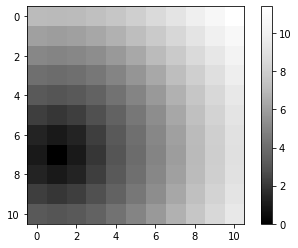

In [0]:
def good_metric(x, y):
  return np.linalg.norm(x-y)

off = align(anchor, target, 5, good_metric)
print(off)

But we could also define other metrics and see their outcomes.

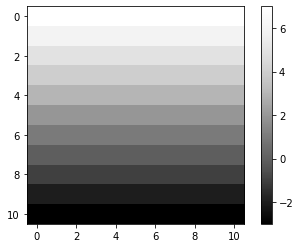

In [0]:
def partial_metric(x, y):
  return x[0]-y[0]

off = align(anchor, target, 5, partial_metric)

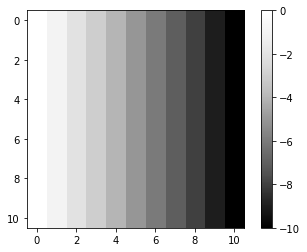

In [0]:
def partially_incorrect_metric(x, y):
  return x[0] - y[1]

off = align(anchor, target, 5, partially_incorrect_metric)

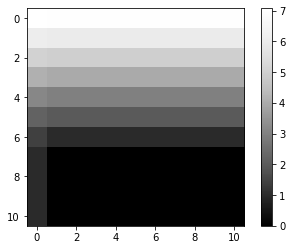

In [0]:
def off_charts_metric(x, y):
  return np.linalg.norm((x-y).clip(min=0))

off = align(anchor, target, 5, off_charts_metric)